In [13]:
import pandas as pd

In [14]:
oil = pd.read_csv("D:/AA/Programming/Data Science/Python/Maven/Data Analysis With Python AND Pandas/Pandas+Course+Resources/Pandas Course Resources/retail/oil.csv")

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [15]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


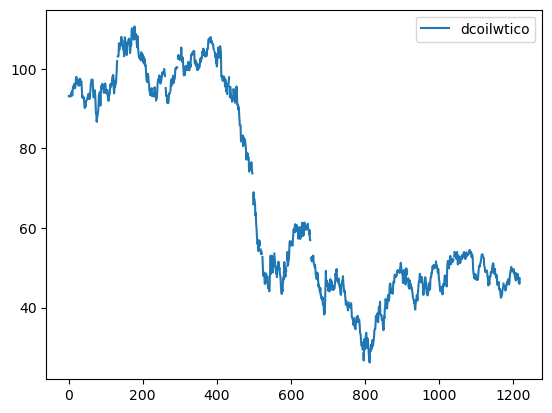

In [16]:
oil.plot();

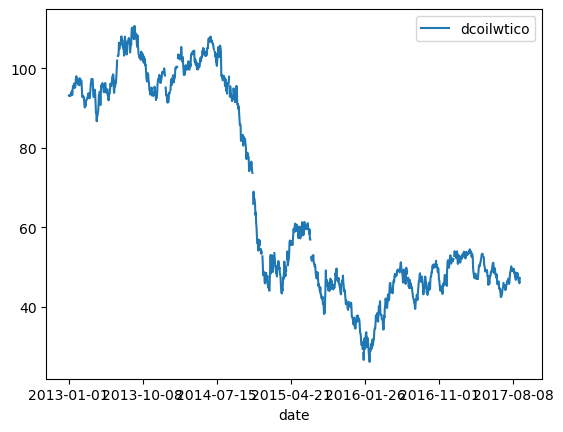

In [17]:
oil.set_index("date").plot();

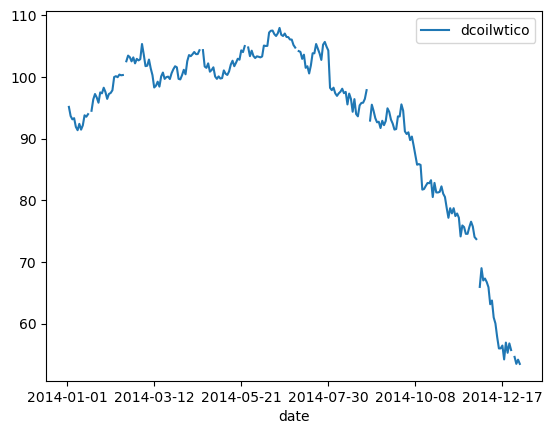

In [18]:
oil.set_index("date").loc["2014-01-01": "2014-12-31" , :].plot();

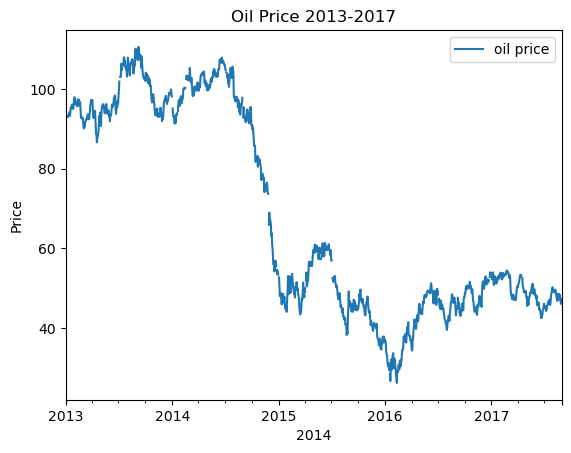

In [19]:
#import seaborn as sns
#sns.set_style("darkgrid")
oil.columns= ["date" , "oil price"]
(oil.astype({"date" : "datetime64[ns]"}).set_index("date")
 .plot(title = "Oil Price 2013-2017",
      xlabel = "2014",
       ylabel = "Price",
       color = "#1f77b4"
      ));

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

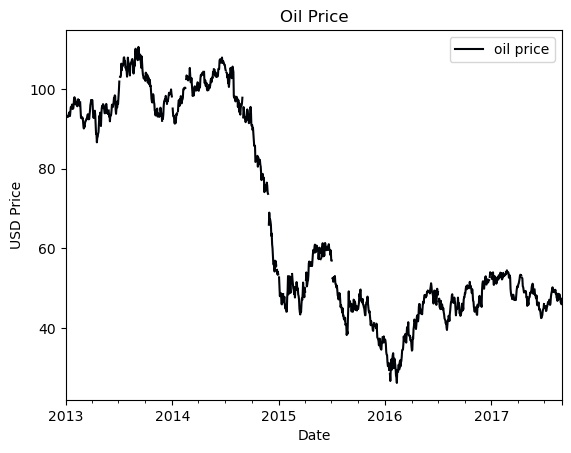

In [20]:
(oil.astype({"date" : "datetime64[ns]"}).set_index("date")
 .plot(title = "Oil Price", 
      xlabel = "Date",
       ylabel = "USD Price",
       color = "#000308",
       style = "-",
       grid = False
      ));

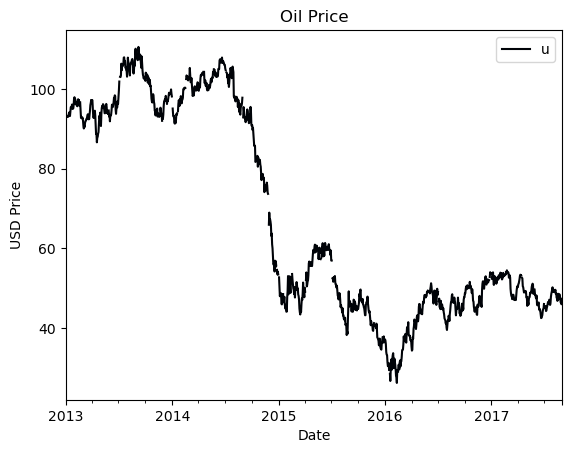

In [21]:
import matplotlib       
#matplotlib.style.use("fivethirtyeight")
(oil.astype({"date" : "datetime64[ns]"}).set_index("date")
 .plot(title = "Oil Price", 
      xlabel = "Date",
       ylabel = "USD Price",
       color = "#000308",
       style = "-",
       grid = False
      ).legend("upper right"));

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [22]:
transaction = pd.read_csv("D:/AA/Programming/Data Science/Python/Maven/Data Analysis With Python AND Pandas/Pandas+Course+Resources/Pandas Course Resources/retail/transactions.csv")

In [23]:
transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [24]:
astype({"date" : "datetime64[ns]"})

NameError: name 'astype' is not defined

In [25]:
(transaction.astype({"date" : "datetime64[ns]"}).loc[transaction["store_nbr"].isin([1,2,3,4])]
 .pivot_table(index = "date" , columns = "store_nbr")
)

transactions                        
store_nbr             1       2       3       4
date                                           
2013-01-02       2111.0  2358.0  3487.0  1922.0
2013-01-03       1833.0  2033.0  3026.0  1551.0
2013-01-04       1863.0  2066.0  3188.0  1596.0
2013-01-05       1509.0  2062.0  3623.0  1825.0
2013-01-06        520.0  1992.0  3590.0  1891.0
...                 ...     ...     ...     ...
2017-08-11        570.0  1698.0  2991.0  1301.0
2017-08-12       1004.0  1613.0  3070.0  1304.0
2017-08-13        416.0  1658.0  3075.0  1378.0
2017-08-14       1733.0  1788.0  3036.0  1285.0
2017-08-15       1693.0  1737.0  2956.0  1283.0

[1678 rows x 4 columns]

In [26]:
stores_1234 = (transaction.astype({"date" : "datetime64[ns]"}).loc[transaction["store_nbr"].isin([1,2,3,4])]
 .pivot_table(index = "date" , columns = "store_nbr")
.droplevel(1,axis = 1))
stores_1234

,transactions,transactions,transactions,transactions
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


In [27]:
stores_1234 = (transaction.astype({"date" : "datetime64[ns]"}).loc[transaction["store_nbr"].isin([1,2,3,4])]
 .pivot_table(index = "date" , columns = "store_nbr")
.droplevel(0,axis = 1))
stores_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


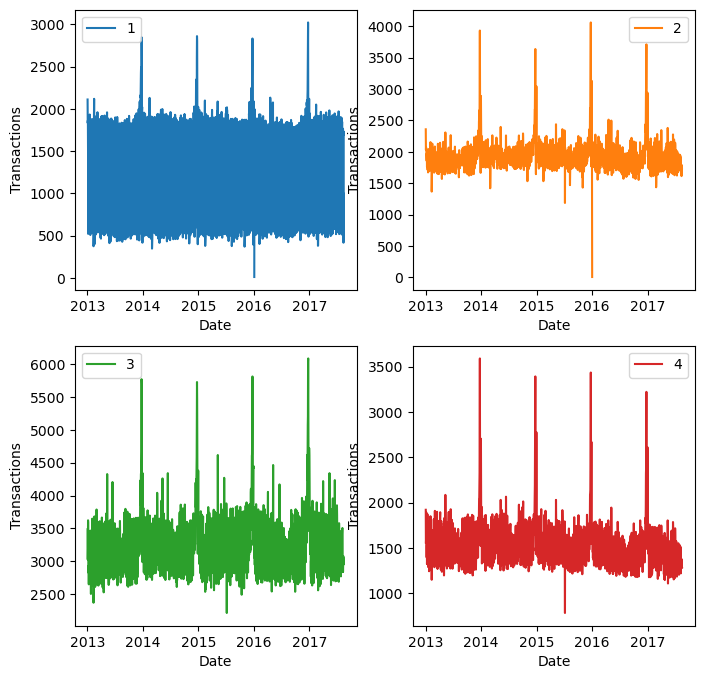

In [28]:
stores_1234.plot(
    xlabel = "Date",
    ylabel = "Transactions",
    subplots = True,
    layout = (2,2),
    sharey = 0, 
    sharex = 0,
    figsize = (8,8)
    );

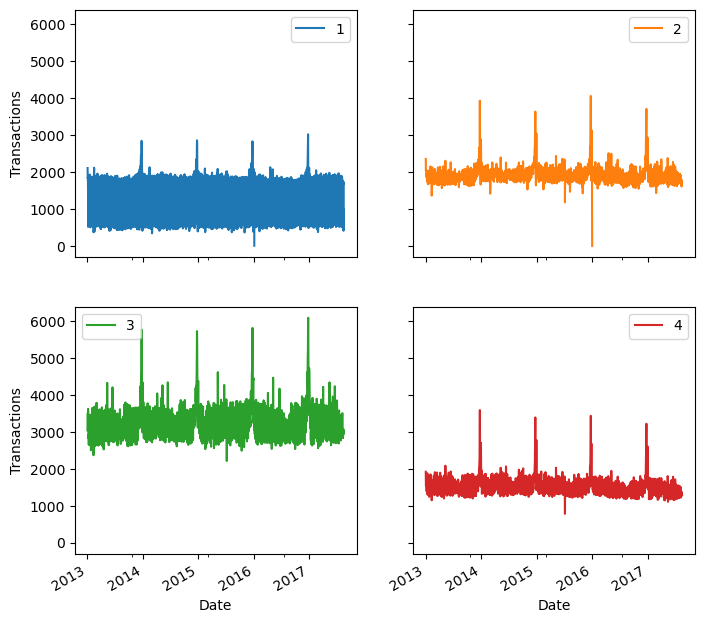

In [29]:
stores_1234.plot(
    xlabel = "Date",
    ylabel = "Transactions",
    subplots = True,
    layout = (2,2),
    sharey = 1, 
    sharex = 1,
    figsize = (8,8)
    );

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

In [30]:
# convert dates to datetime64
stores_1234.index = stores_1234.index.astype("datetime64[ns]") 
stores_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


In [31]:
stores_1234.memory_usage(deep = True)
#.apply( lambda x : sum(x))
#.plot.bar();

Index    13424
1        13424
2        13424
3        13424
4        13424
dtype: int64

In [32]:
stores_1234.duplicated().sum()

0

In [33]:
stores_1234.info(show_counts = 1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1678 entries, 2013-01-02 to 2017-08-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1676 non-null   float64
 1   2       1677 non-null   float64
 2   3       1676 non-null   float64
 3   4       1676 non-null   float64
dtypes: float64(4)
memory usage: 65.5 KB


In [34]:
stores_1234.fillna({"1" : 0 ,
                   "2" : 0 , 
                   "3" : 0 , 
                   "4" : 0
                   })

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


In [35]:
stores_1234.sum()

store_nbr
1    2553963.0
2    3219901.0
3    5366350.0
4    2519007.0
dtype: float64

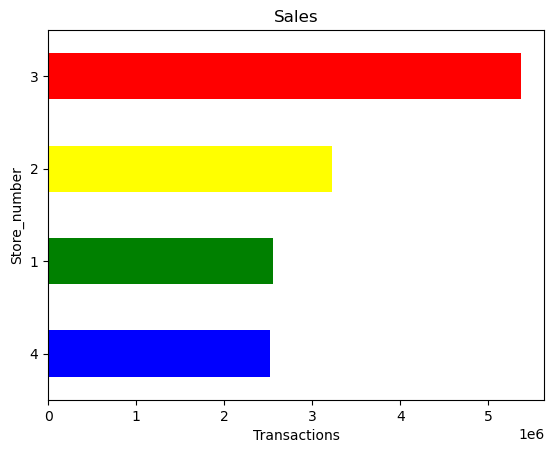

In [36]:
(stores_1234
 .sum()
 .sort_values(ascending = True)
 .plot(
     kind = "barh" , 
     title = "Sales" , 
     ylabel = "Store_number" , 
     xlabel = "Transactions",
     legend = 0,
     color = ["blue" , 'green' , 'yellow' , 'red']
 )
);

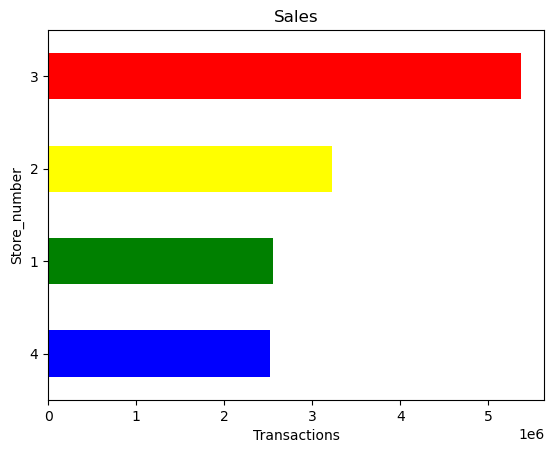

In [37]:
(stores_1234
 .sum()
 .sort_values(ascending = True)
 .plot(
     kind = "barh" , 
     title = "Sales" , 
     ylabel = "Store_number" , 
     xlabel = "Transactions",
     legend = 0,
     color = ["blue" , 'green' , 'yellow' , 'red']
 )
);

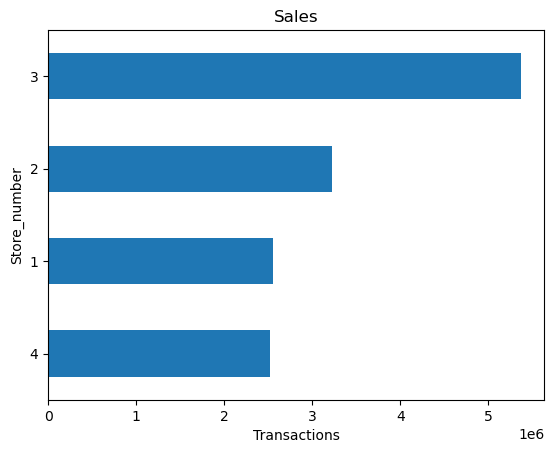

In [38]:
(stores_1234
 .sum()
 .sort_values(ascending = True)
 .plot(
     kind = "barh" , 
     title = "Sales" , 
     ylabel = "Store_number" , 
     xlabel = "Transactions",
     legend = 0,
 )
);

In [39]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.


In [40]:
stores_1234.index.month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
      dtype='int32', name='date', length=1678)

In [41]:
stores_1234_month = stores_1234.groupby(stores_1234.index.month).sum()
stores_1234_month

store_nbr,1,2,3,4
date,,,,
1,229203.0,284134.0,463260.0,222075.0
2,209400.0,265922.0,437238.0,209211.0
3,232178.0,293076.0,487224.0,231837.0
4,229081.0,287325.0,478308.0,223928.0
5,231160.0,293588.0,491961.0,228753.0
6,231514.0,284835.0,474668.0,222678.0
7,236032.0,288783.0,484698.0,224327.0
8,202821.0,255475.0,431752.0,200100.0
9,182035.0,228658.0,379101.0,178172.0


In [42]:
#transaction["date"][(transaction["month"] == 1)].count()

In [43]:
#transaction["transactions"][(transaction["month"] == 1) & (transaction["store_nbr"] == 1)].sum()

In [44]:
#transaction[(transaction["store_nbr"] == 1) & (transaction["month"] == 1)].sum()

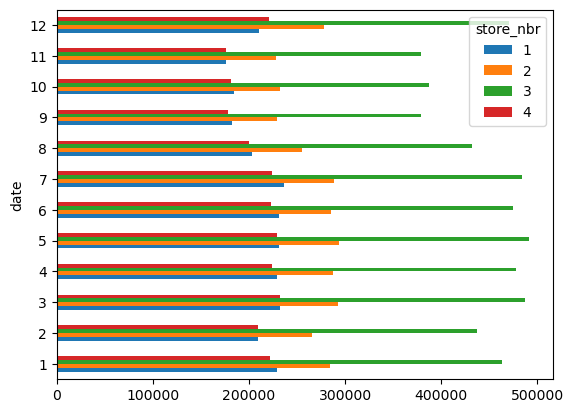

In [45]:
stores_1234_month.plot(kind = "barh");

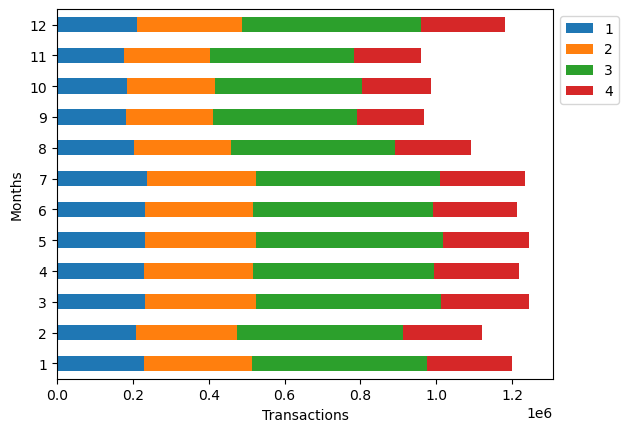

In [46]:
stores_1234_month.plot(
    kind = "barh" , 
    ylabel = "Months" ,
    xlabel = "Transactions" , 
    stacked = True
).legend(bbox_to_anchor = (1,1));

In [47]:
stores_1234_month

store_nbr,1,2,3,4
date,,,,
1,229203.0,284134.0,463260.0,222075.0
2,209400.0,265922.0,437238.0,209211.0
3,232178.0,293076.0,487224.0,231837.0
4,229081.0,287325.0,478308.0,223928.0
5,231160.0,293588.0,491961.0,228753.0
6,231514.0,284835.0,474668.0,222678.0
7,236032.0,288783.0,484698.0,224327.0
8,202821.0,255475.0,431752.0,200100.0
9,182035.0,228658.0,379101.0,178172.0


In [48]:
full_stacked_stores_1234_month = stores_1234_month.apply(lambda x : sum(x) , axis = 0)
full_stacked_stores_1234_month

store_nbr
1    2553963.0
2    3219901.0
3    5366350.0
4    2519007.0
dtype: float64

In [50]:
transaction[(transaction["store_nbr"] == 1) & (transaction["month"] == 1)].sum()

KeyError: 'month'

In [51]:
full_stacked_stores_1234_month = stores_1234_month.apply(lambda x : sum(x) , axis = 1)
full_stacked_stores_1234_month

date
1     1198672.0
2     1121771.0
3     1244315.0
4     1218642.0
5     1245462.0
6     1213695.0
7     1233840.0
8     1090148.0
9      967966.0
10     985669.0
11     959215.0
12    1179826.0
dtype: float64

In [52]:
full_stacked_stores_1234_month_100Percent = stores_1234_month.apply(lambda x : x*100 / sum(x) , axis = 1)
full_stacked_stores_1234_month_100Percent

store_nbr,1,2,3,4
date,,,,
1,19.121411,23.704066,38.647770,18.526753
2,18.666912,23.705551,38.977474,18.650063
3,18.659102,23.553200,39.156001,18.631697
4,18.798056,23.577474,39.249263,18.375208
5,18.560181,23.572618,39.500282,18.366919
6,19.075138,23.468417,39.109331,18.347114
7,19.129871,23.405223,39.283700,18.181207
8,18.604905,23.434891,39.604898,18.355306
9,18.805929,23.622524,39.164702,18.406845


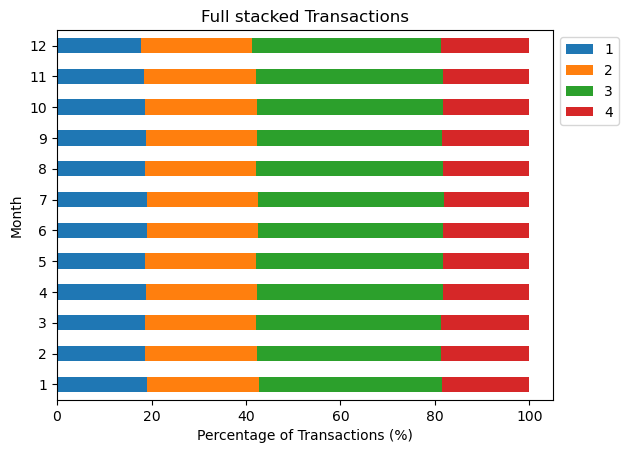

In [53]:
full_stacked_stores_1234_month_100Percent.plot(
    kind = "barh",
    stacked = True , 
    title = "Full stacked Transactions" , 
    xlabel = "Percentage of Transactions (%)" , 
    ylabel = "Month" , 
    ).legend(bbox_to_anchor = (1,1))

In [54]:
transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [55]:
type(transaction["date"])

pandas.core.series.Series

In [56]:
month = transaction["date"].str[5:7].astype("int")
month

0        1
1        1
2        1
3        1
4        1
        ..
83483    8
83484    8
83485    8
83486    8
83487    8
Name: date, Length: 83488, dtype: int32

In [57]:
transaction["month"] = month
transaction

,date,store_nbr,transactions,month
0,2013-01-01,25,770,1
1,2013-01-02,1,2111,1
2,2013-01-02,2,2358,1
3,2013-01-02,3,3487,1
4,2013-01-02,4,1922,1
...,...,...,...,...
83483,2017-08-15,50,2804,8
83484,2017-08-15,51,1573,8
83485,2017-08-15,52,2255,8
83486,2017-08-15,53,932,8


In [58]:
transaction[(transaction["store_nbr"] == 1) & transaction["month"] == 1].sum()

date            2013-01-022013-01-032013-01-042013-01-052013-0...
store_nbr                                                     852
transactions                                              1286565
month                                                        4866
dtype: object

In [59]:
transaction

,date,store_nbr,transactions,month
0,2013-01-01,25,770,1
1,2013-01-02,1,2111,1
2,2013-01-02,2,2358,1
3,2013-01-02,3,3487,1
4,2013-01-02,4,1922,1
...,...,...,...,...
83483,2017-08-15,50,2804,8
83484,2017-08-15,51,1573,8
83485,2017-08-15,52,2255,8
83486,2017-08-15,53,932,8


In [60]:
stores_1234.groupby(stores_1234.index.month)

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [61]:
import seaborn as sns
sns.set_style("darkgrid")

In [62]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


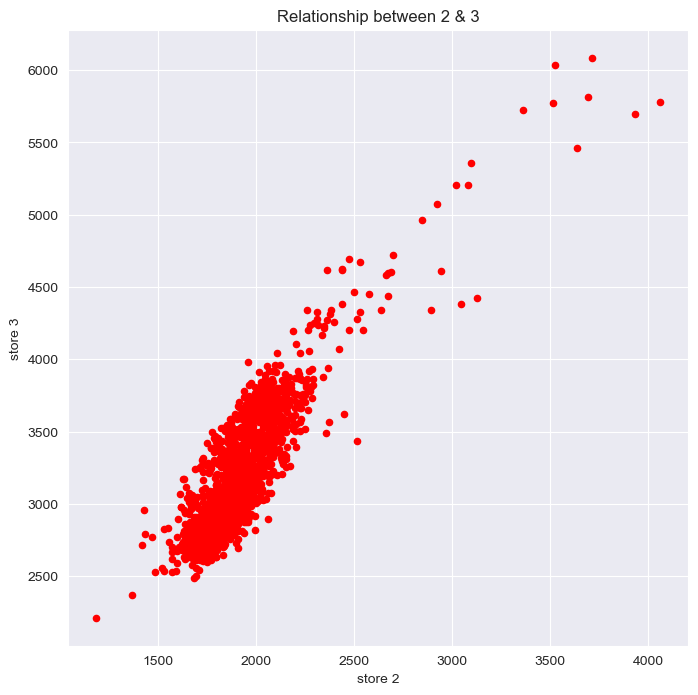

In [63]:
(stores_1234
 .plot
 .scatter(x = 2 , 
          y = 3 , 
          xlabel = "store 2" , 
          ylabel = "store 3" , 
          figsize = (8,8) , 
          color = ["red"] ,
          title = "Relationship between 2 & 3"
                        ));

In [64]:
c=stores_1234.index.month
c

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
      dtype='int32', name='date', length=1678)

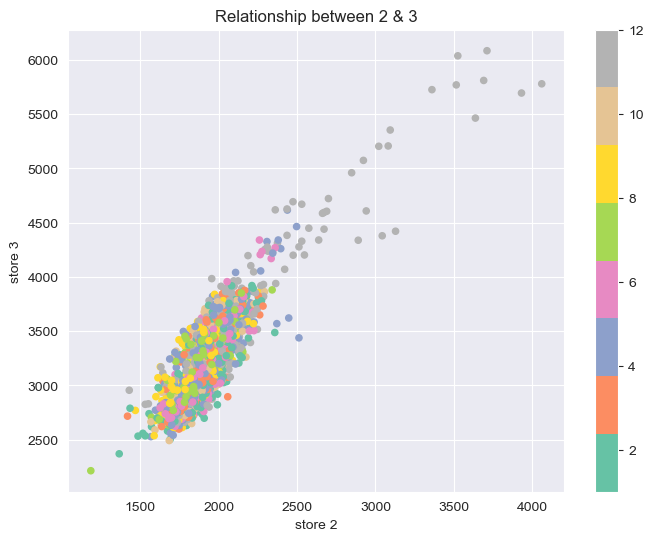

In [65]:
(stores_1234
 .plot
 .scatter(x = 2 , 
          y = 3 , 
          xlabel = "store 2" , 
          ylabel = "store 3" , 
          figsize = (8,6) ,
          title = "Relationship between 2 & 3" , 
          c=stores_1234.index.month,
          colormap = "Set2"
                        ));

In [66]:
stores_1234.sum()

store_nbr
1    2553963.0
2    3219901.0
3    5366350.0
4    2519007.0
dtype: float64

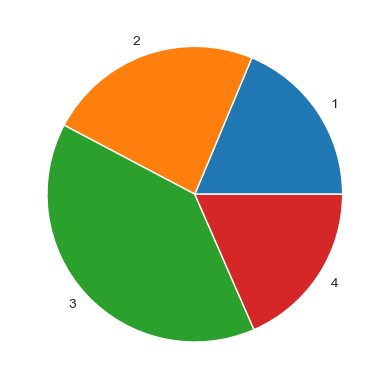

In [67]:
(stores_1234.sum()
 .plot.pie(y = "store_nbr")
);

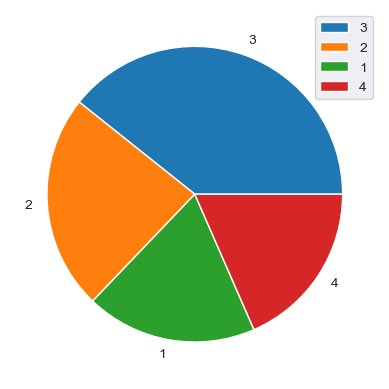

In [68]:
(stores_1234
 .sum()
 .sort_values(ascending = False)
 .plot.pie(y = "store_nbr")
).legend(bbox_to_anchor = (1,1));

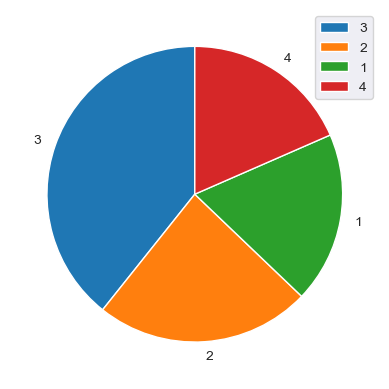

In [69]:
(stores_1234
 .sum()
 .sort_values(ascending = False)
 .plot.pie(y = "store_nbr" , startangle = 90)
).legend(bbox_to_anchor = (1,1));

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [70]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


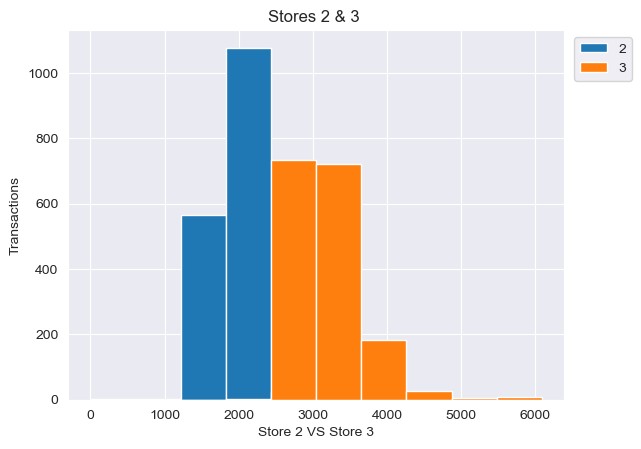

In [90]:
(stores_1234
 .loc[: , [2,3]]
 .plot.hist( title = "Stores 2 & 3 ",
            xlabel = "Store 2 VS Store 3",
            ylabel = "Transactions",
 )
 .legend(bbox_to_anchor = (1.15,1))

);

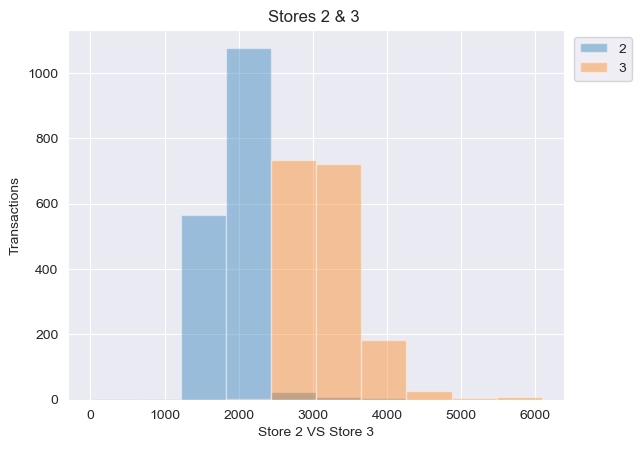

In [93]:
(stores_1234
 .loc[: , [2,3]]
 .plot.hist( title = "Stores 2 & 3 ",
            xlabel = "Store 2 VS Store 3",
            ylabel = "Transactions",
            alpha = 0.4
 )
 .legend(bbox_to_anchor = (1.15,1))

);

<Axes: ylabel='Frequency'>

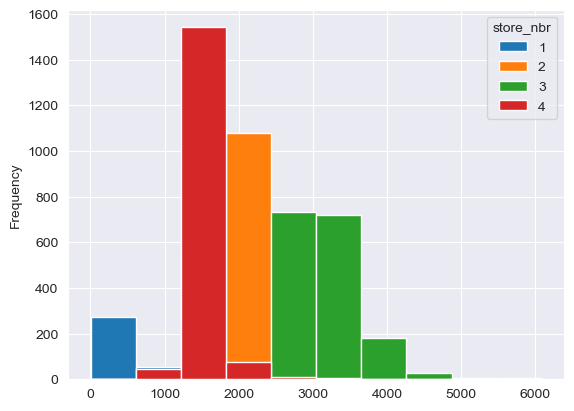

In [94]:
stores_1234.plot.hist();

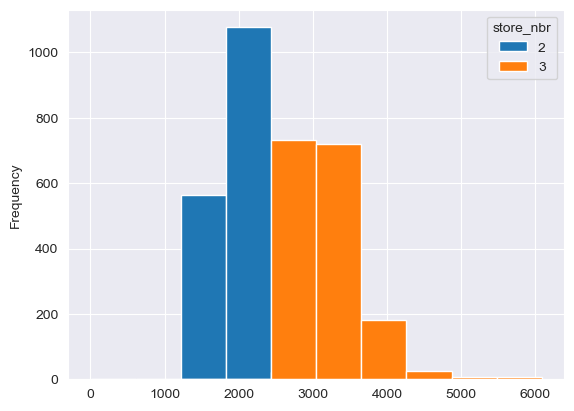

In [95]:
stores_1234.loc[: , [2,3]].plot.hist();